In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('with_sentence_indexing.csv')

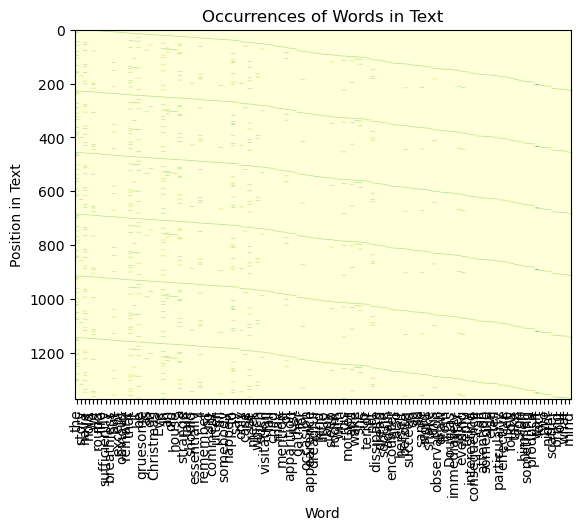

In [3]:
# Convert the indices column from string to list
df["indices"] = df["indices"].apply(lambda x: ast.literal_eval(x))

# Create a matrix with zeros
n = max([max(indices) for indices in df["indices"]]) + 1
matrix = np.zeros((n, len(df)))
for i, row in df.iterrows():
    for idx in row["indices"]:
        matrix[idx, i] = 1  # Set the value to 1 for each index where the word appears for the given word

# Plot the heatmap
plt.imshow(matrix, cmap="YlGnBu", aspect="auto")
plt.xticks(np.arange(len(df)), df["word"], rotation=90)
plt.xlabel("Word")
plt.ylabel("Position in Text")
plt.title("Occurrences of Words in Text")
plt.show()

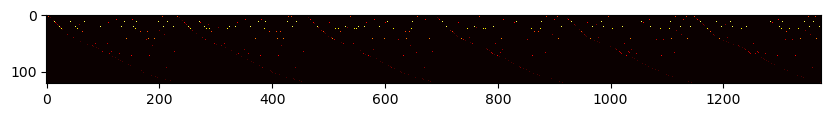

In [4]:
import csv
import ast
import numpy as np
import matplotlib.pyplot as plt

# Create a dictionary to store the data
data = {}

# Open the CSV file and read the data
with open('with_sentence_indexing.csv') as f:
    reader = csv.reader(f)
    next(reader)  # Skip the first row
    for row in reader:
        word, count, indices_str = row
        count = int(count)
        indices = ast.literal_eval(indices_str)
        data[word] = (count, indices)

# Get the maximum index value for setting the heatmap dimensions
max_index = max(max(data[word][1]) for word in data)

# Create a numpy array to store the heatmap data
heatmap = np.zeros((len(data), max_index + 1))

# Populate the heatmap array with the index values for each word
for i, word in enumerate(data):
    for index in data[word][1]:
        heatmap[i, index] = data[word][0]

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.show()

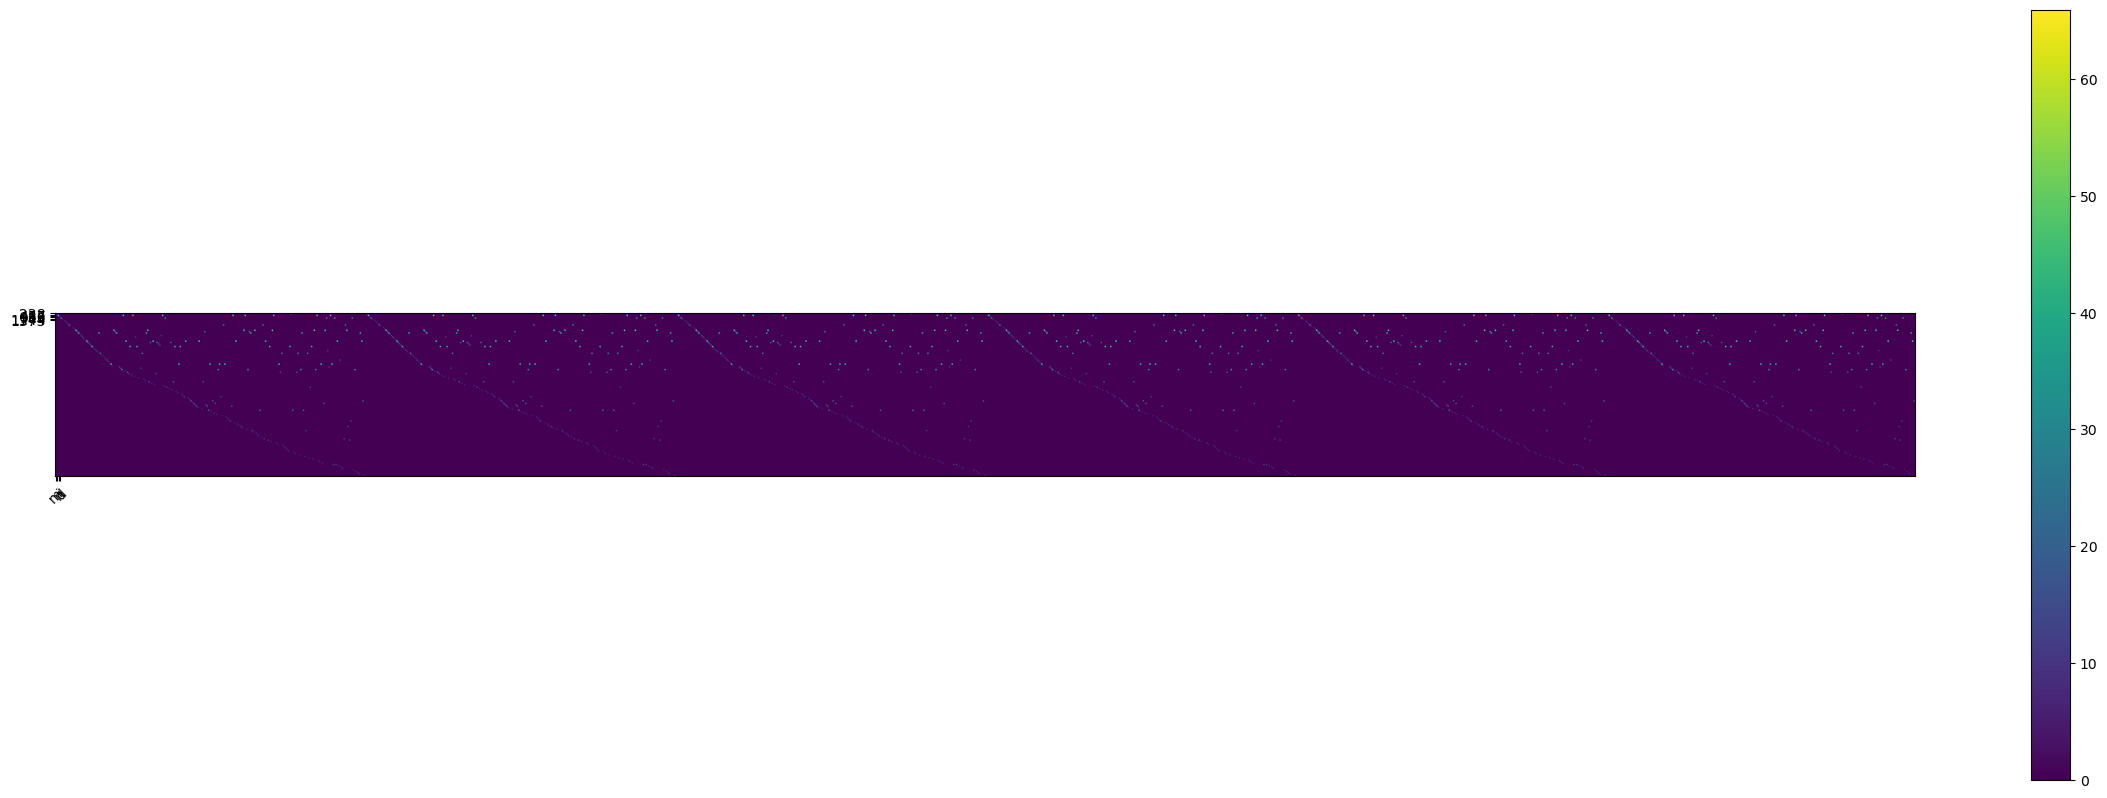

In [5]:
fig, ax = plt.subplots(figsize=(30, 10))
im = ax.imshow(heatmap, cmap='viridis')
ax.set_xticks(np.arange(len(word)))
ax.set_yticks(np.arange(len(indices)))
ax.set_xticklabels(word)
ax.set_yticklabels(indices)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fig.colorbar(im)
plt.show()


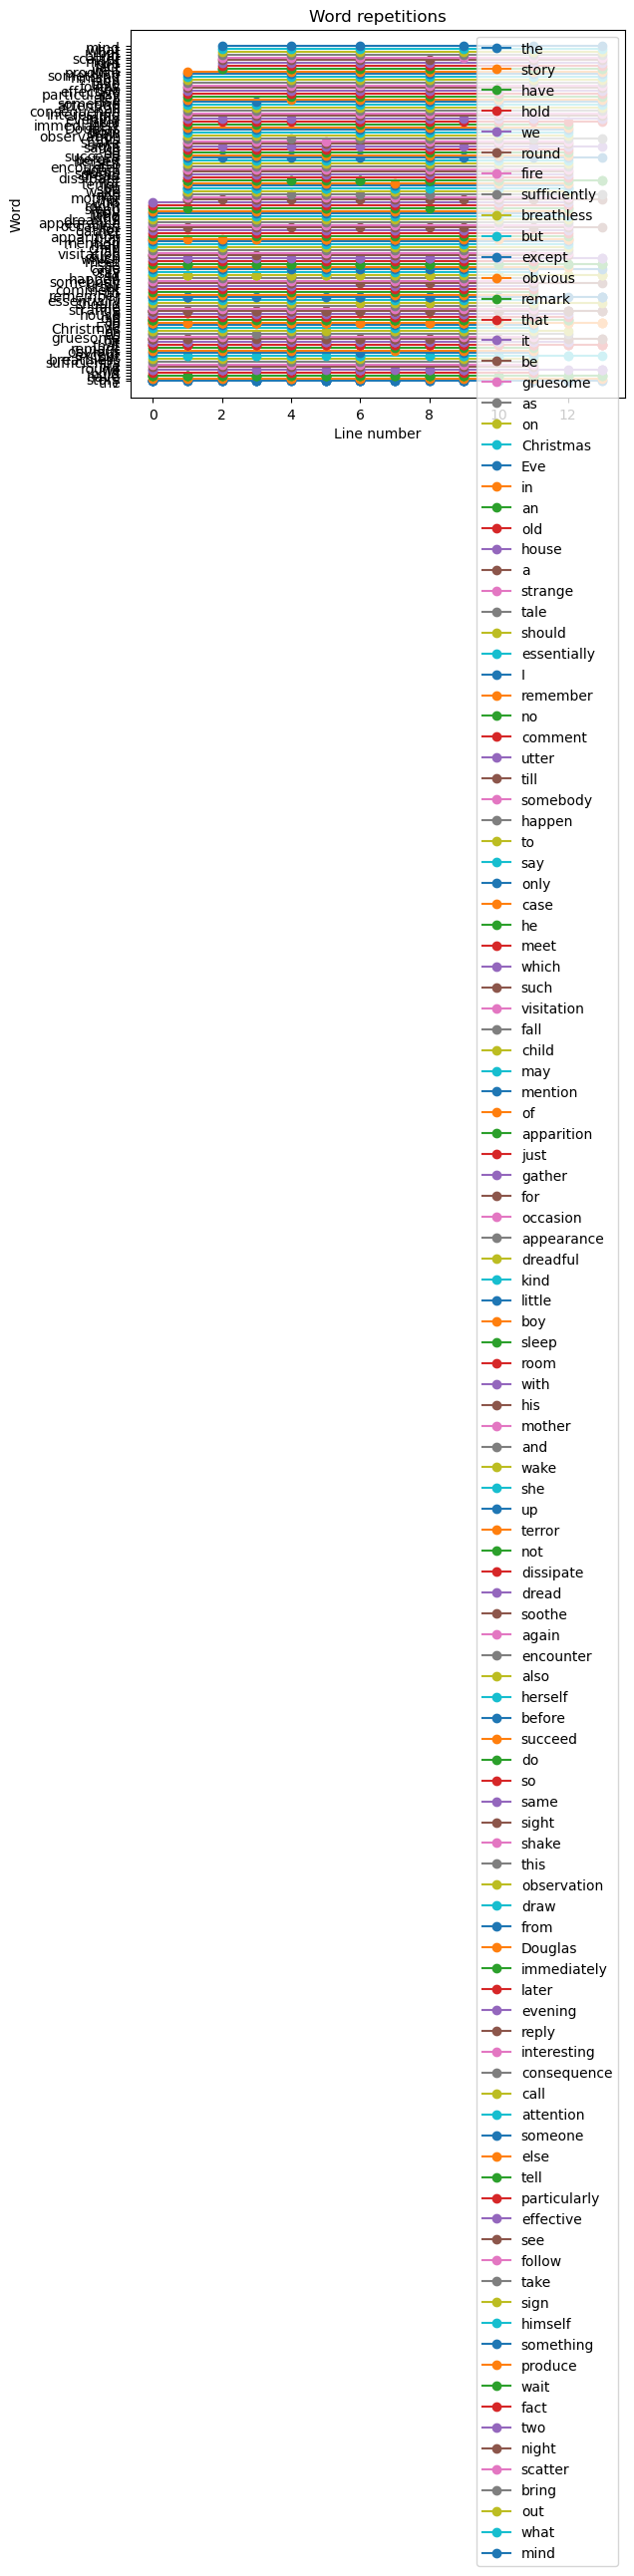

In [6]:
import matplotlib.pyplot as plt
import ast

with open('with_sentence_indexing.csv') as f:
    reader = csv.reader(f)
    next(reader)  # Skip the first row
    for row in reader:
        word, count, indices_str = row
        count = int(count)
        indices = ast.literal_eval(indices_str)
        data[word] = (count, indices)

# Create figure and axes
fig, ax = plt.subplots()

# Plot data as lines
for word, (count, indices) in data.items():
    y = [i // 100 for i in indices]  # convert indices to line numbers
    ax.plot(y, [word] * count, 'o-', label=word)

# Set axis labels and title
ax.set_xlabel('Line number')
ax.set_ylabel('Word')
ax.set_title('Word repetitions')

# Add legend and show plot
ax.legend()
plt.show()


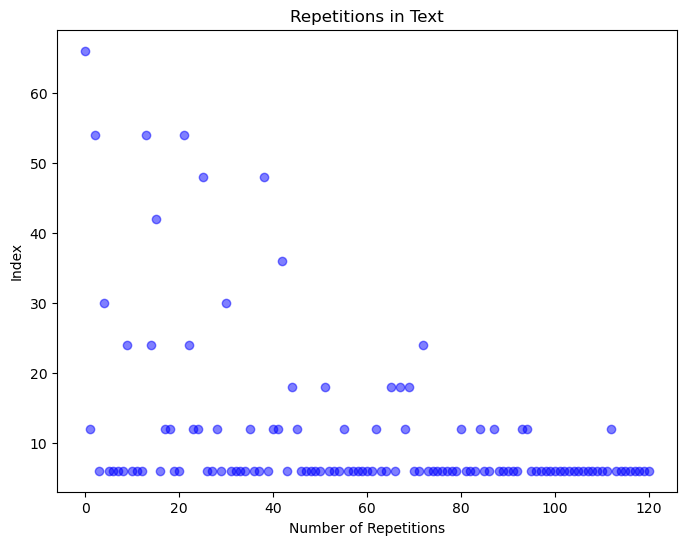

In [7]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df.index, df['number_of_repetitions'], c='b', alpha=0.5)

# Set the axis labels and title
ax.set_xlabel('Number of Repetitions')
ax.set_ylabel('Index')
ax.set_title('Repetitions in Text')

# Show the plot
plt.show()

In [10]:
import plotly.express as px

# Create the scatter plot with hover information
fig = px.scatter(df, x=df.index, y="number_of_repetitions", hover_name='word')

# Set the axis labels and title
fig.update_layout(xaxis_title='Number of Repetitions', yaxis_title='Index', title='Repetitions in Text')

# Show the plot
fig.show()

In [11]:
import plotly.io as pio

pio.write_html(fig, 'scatter_plot_of_repetitions.html')